In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


### Data Preprocess

In [3]:
# wrangle function
def wrangle(filepath):
    # Read csv file into Data Frame
    df = pd.read_csv(filepath)
    # Clean column names
    df = df.rename(columns=lambda x: x.strip().strip('"'))

# Rename columns
    df['pilotstate'] = df['pilotstate(EV_DISCONNECTED = \'A\'_EV_CONNECTED = \'B1\'_WAITING_FOR_EV = \'B2\'_STOP_MODE = \'C1\'_CHARGING_MAX_POWER = \'C2\'_FAULT_RESTART = \'F\'']
    df['loadcontrolgridimportexport-n'] = df['zappimode(1=FAST.2=ECO.3=ECO+)']
    df['zappimode'] = df[')']
    df['dsrdataload-n'] = df['loadcontrolgridimportexport']
    df['dsrdataseconds-n'] = df['dsrdataload']

# Drop redundant columns
    df.drop(columns=['pilotstate(EV_DISCONNECTED = \'A\'_EV_CONNECTED = \'B1\'_WAITING_FOR_EV = \'B2\'_STOP_MODE = \'C1\'_CHARGING_MAX_POWER = \'C2\'_FAULT_RESTART = \'F\'',
            'zappimode(1=FAST.2=ECO.3=ECO+)', 'loadcontrolgridimportexport', 'dsrdataload', 'dsrdataseconds', ')'], inplace=True)

# Convert time format
    df = df.set_index('timestamp')
    df.index = pd.to_datetime(df.index, unit='s')
    return df


### DataFrame Legend

power                                                                                                           timestamp                                                                                                       dsrloadcontrolactive                                                                                            
voltage                                                                                                         frequency                                                                                                       chargeenergy                                                                                                    pilotstate = (EV_DISCONNECTED = 'A',_EV_CONNECTED = 'B1',_WAITING_FOR_EV = 'B2',_STOP_MODE, 'C1'_CHARGING_MAX_POWER)
zappimode(1=FAST.2=ECO.3=ECO+)
loadcontrolgridimportexport
dsrdataload                                                                                                     dsrdataseconds

In [4]:
df = wrangle('./Data/chargerdata2_2023_06_10_Anonymized.csv')


df.head(5)


,id,power,dsrloadcontrolactive,voltage,frequency,chargeenergy,pilotstate,loadcontrolgridimportexport-n,zappimode,dsrdataload-n,dsrdataseconds-n
timestamp,,,,,,,,,,,
2023-05-01 16:25:12,1,0,False,2389,4997,18.20,A,898,FAST,0,0
2023-05-01 16:25:12,2,0,False,2419,4994,36.53,A,-2219,FAST,0,0
2023-05-01 16:25:12,3,0,False,2408,4995,24.28,A,400,FAST,0,0
2023-05-01 16:25:12,4,0,False,2399,4988,17.44,A,-4,ECO_PLUS,0,0
2023-05-01 16:25:12,5,0,False,2385,4993,4.53,NaN,-4,NaN,0,0


In [6]:
df1 = pd.DataFrame(df['power'])
df1.head(5)


,power
timestamp,
2023-05-01 16:25:12,0
2023-05-01 16:25:12,0
2023-05-01 16:25:12,0
2023-05-01 16:25:12,0
2023-05-01 16:25:12,0


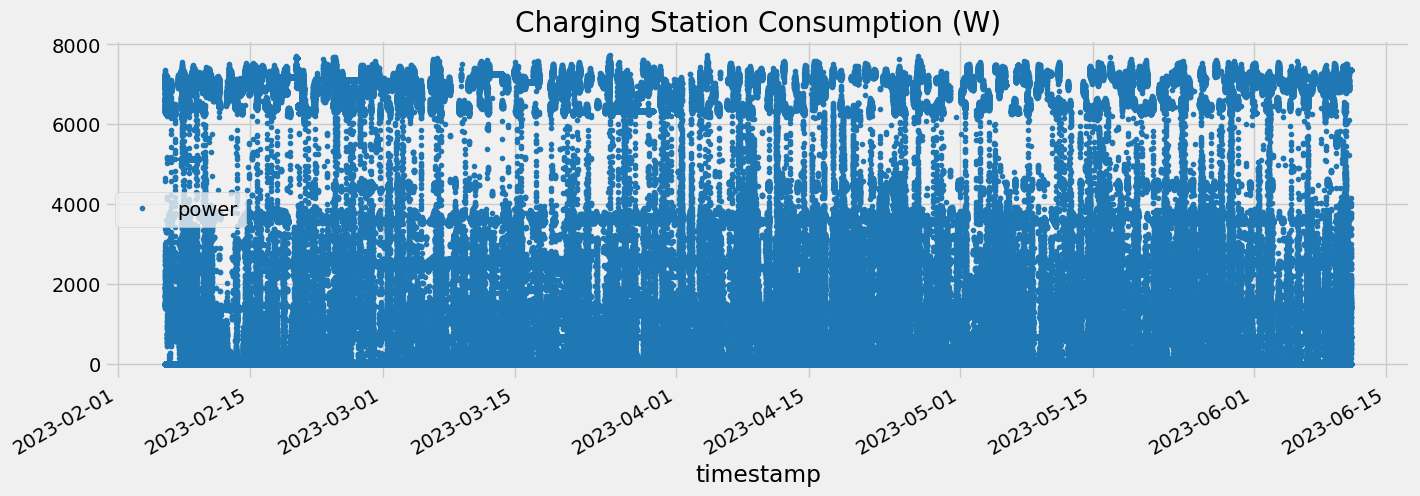

In [9]:
df1.plot(style='.',
         figsize=(15, 5),
         color=color_pal[0],
         title='Charging Station Consumption (W)'
         )
plt.show()


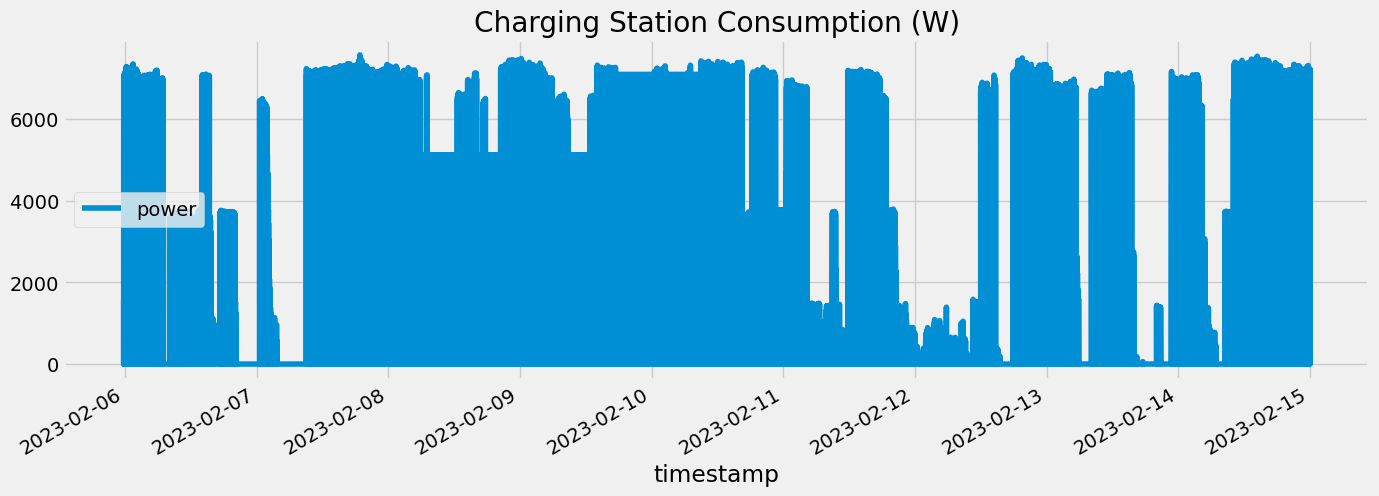

In [8]:
df1.loc[(df1.index > '2023-02-01') & (df1.index < '2023-02-15')].plot(
    figsize=(15, 5),
    title='Charging Station Consumption (W)'
)
plt.show()
